In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df = pd.read_csv("Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
linked = linkage(X_scaled, method='ward')



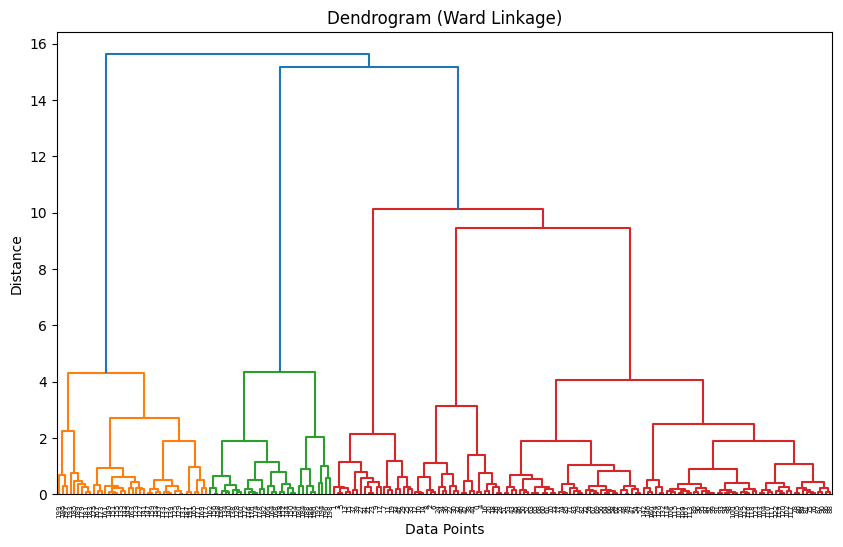

In [4]:
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [5]:
agg = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)

df['Cluster_Hierarchical'] = agg.fit_predict(X_scaled)


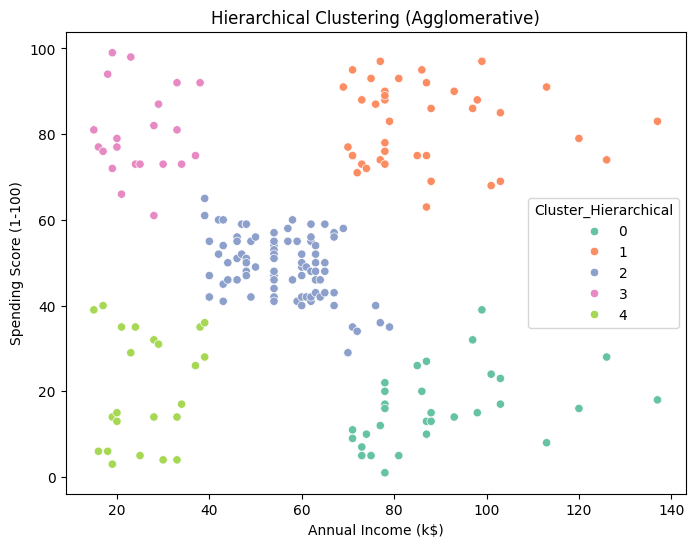

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster_Hierarchical'],
    palette='Set2'
)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.show()


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)


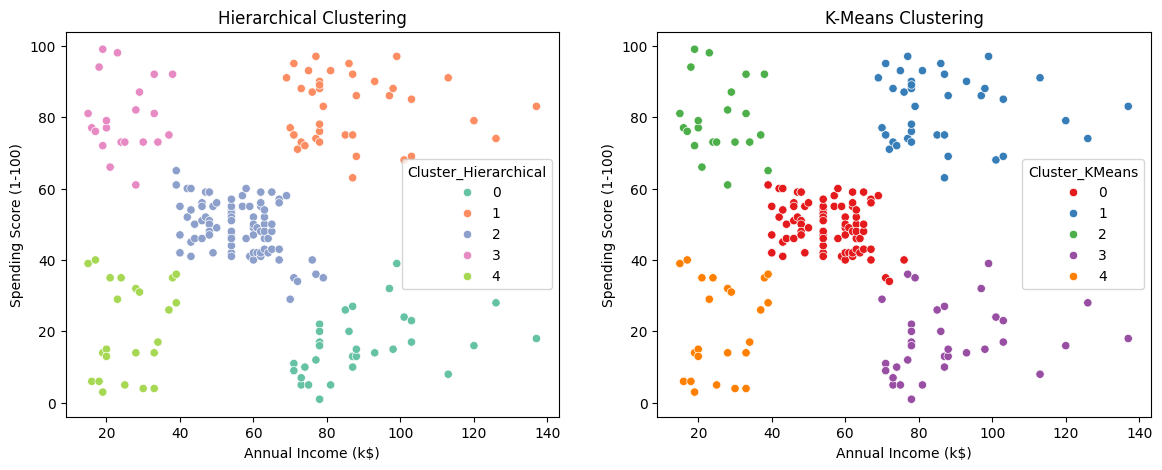

In [8]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster_Hierarchical'],
    palette='Set2'
)
plt.title("Hierarchical Clustering")

plt.subplot(1,2,2)
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster_KMeans'],
    palette='Set1'
)
plt.title("K-Means Clustering")

plt.show()
